In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Question No1**

**Delivery_time** 

 Predict delivery time using sorting time 

In [3]:
#import requried libraries
import pandas as pd
import numpy as np


In [4]:
#read csv file
Del=pd.read_csv("/content/drive/MyDrive/Assignment/delivery_time.csv")
Del

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
Del.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
Del.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [7]:
Del.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [8]:
Del.shape

(21, 2)

In [9]:
#to see the information about dataset
Del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [10]:
Del.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [11]:
#import seaborn for understand the dataset by vizualization
import seaborn as sns


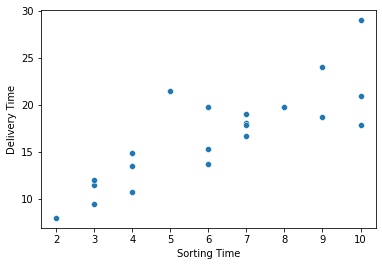

In [12]:
sns.scatterplot(x=Del['Sorting Time'],y=Del['Delivery Time'])

# Correlation

In [13]:
#0.82 relation between x and y
Del.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


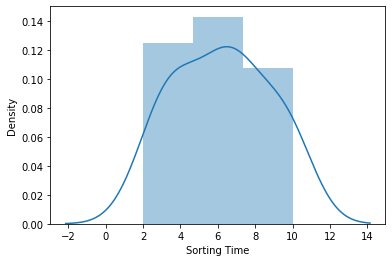

In [14]:
sns.distplot(Del['Sorting Time'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


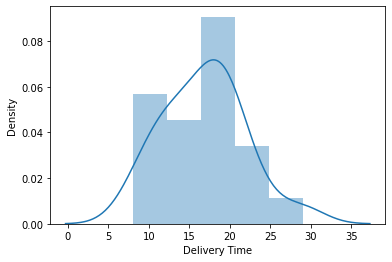

In [15]:
sns.distplot(Del['Delivery Time'])

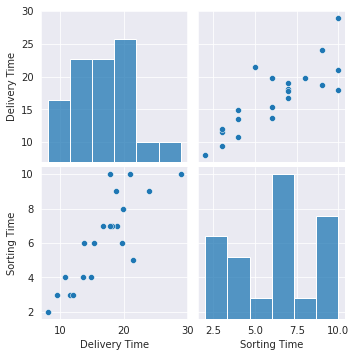

In [16]:
sns.set_style(style='darkgrid')
sns.pairplot(Del)

In [17]:
data_cleaned1=Del.rename({'Delivery Time':'DelTime'},axis=1)
data_cleaned1

,DelTime,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [18]:
data_cleaned2=data_cleaned1.rename({'Sorting Time':'SorTime'},axis=1)
data_cleaned2

,DelTime,SorTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [19]:
Del=data_cleaned2.copy()
Del

,DelTime,SorTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Fitting A Linear Regression Model By Using OLS

In [20]:
import statsmodels.formula.api as smf
model = smf.ols("DelTime~SorTime",data=Del).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


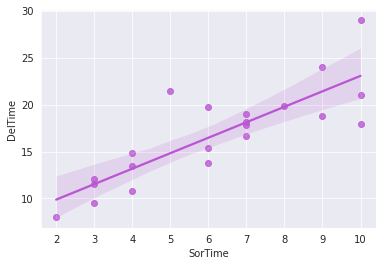

In [21]:
sns.regplot(x='SorTime',y='DelTime',data=Del,color='mediumorchid')

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                DelTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           3.98e-06
Time:                        06:59:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
SorTime        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#Coefficients
model.params

Intercept    6.582734
SorTime      1.649020
dtype: float64

In [24]:
#prediction
newdata=pd.Series([11,25])


In [25]:
data_pred=pd.DataFrame(newdata,columns=['SorTime'])
data_pred

,SorTime
0,11
1,25


In [26]:
model.predict(data_pred)

0    24.721953
1    47.808231
dtype: float64

# By Using **SKLEARN**

In [27]:
x=Del.iloc[:,:-1].values                        
y=Del.iloc[:,1].values 
print(x)
print(y)

[[21.  ]
 [13.5 ]
 [19.75]
 [24.  ]
 [29.  ]
 [15.35]
 [19.  ]
 [ 9.5 ]
 [17.9 ]
 [18.75]
 [19.83]
 [10.75]
 [16.68]
 [11.5 ]
 [12.03]
 [14.88]
 [13.75]
 [18.11]
 [ 8.  ]
 [17.83]
 [21.5 ]]
[10  4  6  9 10  6  7  3 10  9  8  4  7  3  3  4  6  7  2  7  5]


In [28]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/3,random_state=1)

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()  #y=ax+b
mymodel=model.fit(xtrain,ytrain)

In [30]:
#prediction
y_pred=mymodel.predict(xtest)
print(y_pred)

[5.58751198 7.4644909  9.04570345 2.97870086 6.81228812 4.50682714
 5.15902992]


In [36]:
#diff of y_pred is predicted by model and ytest is actual
new=pd.Series(y_pred,ytest)
new

4    5.587512
8    7.464491
9    9.045703
2    2.978701
7    6.812288
3    4.506827
6    5.159030
dtype: float64

In [37]:
y_pred


array([5.58751198, 7.4644909 , 9.04570345, 2.97870086, 6.81228812,
       4.50682714, 5.15902992])

In [38]:
ytest

array([4, 8, 9, 2, 7, 3, 6])

In [40]:
mymodel.predict([[11]]) 

array([4.11626385])

In [43]:
mymodel.coef_ 


array([0.37918766])

In [42]:
mymodel.intercept_

-0.054800429622807734

In [44]:
0.37918766*11+-0.054800429622807734

4.116263830377192

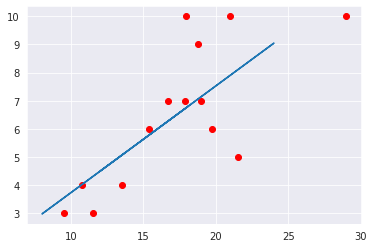

In [46]:
import matplotlib.pyplot as plt
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtest,y_pred)
plt.show()


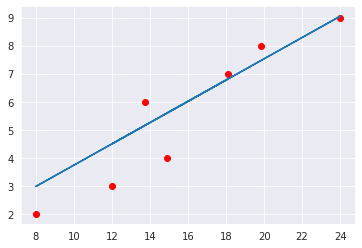

In [47]:
plt.scatter(xtest,ytest,color='red')
plt.plot(xtest,y_pred)
plt.show()

# Question2
**SALARY DATASET**

In [48]:
Sal=pd.read_csv("/content/drive/MyDrive/Assignment/Salary_Data.csv")

In [49]:
Sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [50]:
Sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [51]:
Sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [52]:
Sal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [53]:
Sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


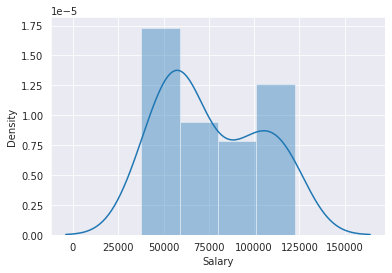

In [54]:
sns.distplot(Sal['Salary'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


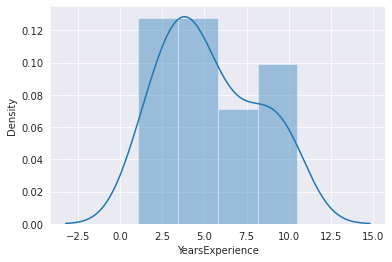

In [55]:
sns.distplot(Sal['YearsExperience'])

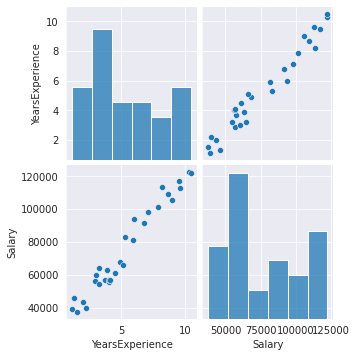

In [56]:
sns.set_style(style='darkgrid')
sns.pairplot(Sal)

# **METHOD-1:OLS MODEL**

In [57]:
import statsmodels.formula.api as smf
model1=smf.ols("Salary~YearsExperience",data=Sal).fit()

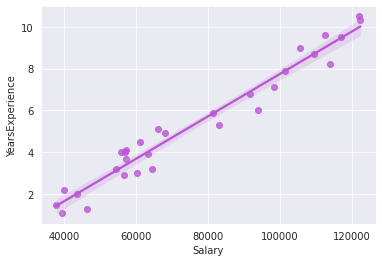

In [58]:
sns.regplot(x='Salary',y='YearsExperience',data=Sal,color='mediumorchid')

In [59]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.14e-20
Time:                        07:18:48   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
new_sal=pd.Series([20,5.5])
new_sal

0    20.0
1     5.5
dtype: float64

In [62]:
data_predct1=pd.DataFrame(new_sal,columns=['YearsExperience'])
data_predct1

,YearsExperience
0,20.0
1,5.5


In [65]:
model1.predict(data_predct1)

0    214791.446628
1     77766.992967
dtype: float64

# **Method2:**
# By Using **SKLEARN**

In [66]:
x=Sal.iloc[:,:-1].values                        
y=Sal.iloc[:,1].values 
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [67]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/3,random_state=1)

In [68]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()  #y=ax+b
mymodel=model.fit(xtrain,ytrain)

In [69]:
#prediction
y_pred=mymodel.predict(xtest)
print(y_pred)

[ 74675.37776747  91160.02832519  61853.98288925  81086.07520659
  67348.86640849  88412.58656557 113139.56240215  44453.51841166
 105813.05104316  98486.53968418]


In [70]:
#diff of y_pred is predicted by model and ytest is actual
new=pd.Series(y_pred,ytest)
new

83088.0      74675.377767
98273.0      91160.028325
63218.0      61853.982889
93940.0      81086.075207
61111.0      67348.866408
91738.0      88412.586566
116969.0    113139.562402
43525.0      44453.518412
109431.0    105813.051043
101302.0     98486.539684
dtype: float64

In [71]:
y_pred

array([ 74675.37776747,  91160.02832519,  61853.98288925,  81086.07520659,
        67348.86640849,  88412.58656557, 113139.56240215,  44453.51841166,
       105813.05104316,  98486.53968418])

In [73]:
ytest


array([ 83088.,  98273.,  63218.,  93940.,  61111.,  91738., 116969.,
        43525., 109431., 101302.])

In [74]:
mymodel.predict([[5.5]]) 

array([76507.00560722])

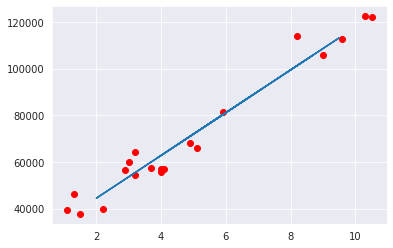

In [75]:
import matplotlib.pyplot as plt
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtest,y_pred)
plt.show()


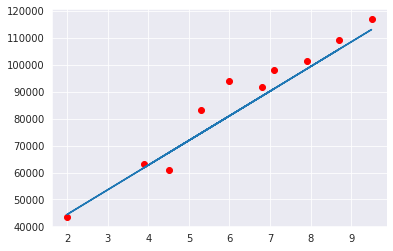

In [76]:
plt.scatter(xtest,ytest,color='red')
plt.plot(xtest,y_pred)
plt.show()